# Capstone Project 2: Literature Clustering of Covid-19 Related News Articles using NLP

## Part 1: Data Gathering and EDA

### Importing Libraries

In [1]:
#import all the essential libraries and packages
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
from scipy import stats
from scipy.stats import t, ttest_ind_from_stats
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
from pandas.io.json import json_normalize

import datetime
from datetime import datetime, timedelta
import requests
import sys
import json
from bs4 import BeautifulSoup

### Function to extract articles from NewsAPI

In [49]:
def last_30_days(date):                                       # function to calculate last 30 days
    date_list = [date - timedelta(days=x) for x in range(30)]
    return sorted(date_list)

def from_date(x):                                           # function to calculate the from_param
    from_date=[]
    for i in range(len(x)):
        from_date.append(last_30_days(datetime.today())[i].date())
    return from_date

def to_date(x):                                         # function to calculate the to_param
    to_date=[]
    for i in range(len(x)):
        to_date.append(last_30_days(datetime.today())[i].date())
    return to_date
    

from_date_list = from_date(last_30_days(datetime.today()))
to_date_list = to_date(last_30_days(datetime.today()))


### Extracting articles using three different newsapi keys

In [50]:
#Extract 100 articles from each day for past 30 days 

from newsapi import NewsApiClient

url = 'http://newsapi.org/v2/everything?'
newsapi_1 = NewsApiClient(api_key='cf478da0d8784f26877dc94b06b0f8e8')


data_1 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_1.get_everything(q='covid OR coronavirus',language='en',sort_by='relevancy',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_1 = data_1.append(d)

data_1

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,"Beth Skwarecki on Vitals, shared by Beth Skwar...",Can Liquid Chalk Really Double as a Hand Sanit...,"To protect ourselves from the coronavirus, the...",https://vitals.lifehacker.com/can-liquid-chalk...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T17:30:00Z,"To protect ourselves from the coronavirus, the...",None,Lifehacker.com
1,Paige Levin,Watch the entire CNN coronavirus town hall,CNN's Anderson Cooper and Dr. Sanjay Gupta hos...,https://www.cnn.com/2020/07/30/app-news-sectio...,https://cdn.cnn.com/cnnnext/dam/assets/2007301...,2020-07-31T02:20:07Z,None,cnn,CNN
2,None,Are these coronavirus numbers too good to be t...,Thailand reports that it has crushed Covid-19 ...,https://www.cnn.com/videos/world/2020/07/31/th...,https://cdn.cnn.com/cnnnext/dam/assets/2007311...,2020-07-31T12:26:13Z,Chat with us in Facebook Messenger. Find out w...,cnn,CNN
3,"Harmeet Kaur, CNN",Can you get Covid-19 through your eyes?,We know that the coronavirus can enter the bod...,https://www.cnn.com/2020/07/31/health/covid-19...,https://cdn.cnn.com/cnnnext/dam/assets/2007311...,2020-07-31T20:50:12Z,None,cnn,CNN
4,"Tina Burnside and Jason Hanna, CNN",Florida sets a record for number of coronaviru...,Florida on Friday marked the fourth consecutiv...,https://www.cnn.com/2020/07/31/health/florida-...,https://cdn.cnn.com/cnnnext/dam/assets/2007311...,2020-07-31T19:25:49Z,None,cnn,CNN
...,...,...,...,...,...,...,...,...,...
95,Reuters Editorial,Brazil to extend coronavirus economic aid on T...,Brazil will officially announce on Tuesday the...,https://af.reuters.com/article/worldNews/idAFK...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-08-29T23:14:00Z,RIO DE JANEIRO (Reuters) - Brazil will officia...,reuters,Reuters
96,JOHN LEICESTER and SAMUEL PETREQUIN / AP,Tour de France Begins With Strict Anti-COVID-1...,The strangest Tour de France ever set off with...,https://time.com/5884825/tour-de-france-pandemic/,https://api.time.com/wp-content/uploads/2020/0...,2020-08-29T19:19:22Z,"(NICE, France) — Delayed but alive again and o...",time,Time
97,insider@insider.com (Susie Neilson),Researchers at the University of Arizona say t...,Researchers at the University of Arizona say t...,https://news.yahoo.com/researchers-university-...,https://s.yimg.com/uu/api/res/1.2/QWNDWIH6sBSW...,2020-08-29T11:09:00Z,University of Arizona students attend class. C...,None,Yahoo Entertainment
98,Reuters Editorial,White House suggests $1.3 trillion coronavirus...,President Donald Trump is willing to sign a $1...,https://in.reuters.com/article/health-coronavi...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-29T02:36:00Z,WASHINGTON (Reuters) - President Donald Trump ...,reuters,Reuters


In [51]:
#Extract 100 articles from each day for past 30 days 

newsapi_2 = NewsApiClient(api_key='b50f5b54f58c4d6f85449b398aad75ed')

data_2 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_2.get_everything(q='covid OR coronavirus',language='en',sort_by='publishedAt',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_2 = data_2.append(d)
data_2

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Carl M. Cannon,COVID Treatment; Nevada Voting; Color and Char...,"Good morning. It's Wednesday, Aug. 5, 2020. On...",https://www.realclearpolitics.com/articles/202...,https://www.realclearpolitics.com/asset/img/ca...,2020-08-01T00:00:00Z,"Good morning. It’s Wednesday, Aug. 5, 2020. On...",None,RealClearPolitics
1,Jonathan Cooper,"McSally, Kelly Move On to Set Up Hot Arizona S...",PHOENIX (AP) - Republican Sen. Martha McSally ...,https://www.realclearpolitics.com/articles/202...,https://assets.realclear.com/images/47/477450_...,2020-08-01T00:00:00Z,PHOENIX (AP) — Republican Sen. Martha McSally ...,None,RealClearPolitics
2,Froma Harrop,How America Got So Inferior,Europe took dramatic steps to contain the coro...,https://www.realclearpolitics.com/articles/202...,https://assets.realclear.com/images/51/517700_...,2020-08-01T00:00:00Z,Europe took dramatic steps to contain the coro...,None,RealClearPolitics
3,Brian Slodysko,"Trump Leads July Fundraising, but Biden Closes...",WASHINGTON (AP) - President Donald Trump took ...,https://www.realclearpolitics.com/articles/202...,https://assets.realclear.com/images/51/517772_...,2020-08-01T00:00:00Z,WASHINGTON (AP) — President Donald Trump took ...,None,RealClearPolitics
4,Carl M. Cannon,Casino Gambit; School Closures; A-Bomb Fallout,"Good morning. It's Thursday, Aug. 6, 2020. On ...",https://www.realclearpolitics.com/articles/202...,https://www.realclearpolitics.com/asset/img/ca...,2020-08-01T00:00:00Z,"Good morning. It’s Thursday, Aug. 6, 2020. On ...",None,RealClearPolitics
...,...,...,...,...,...,...,...,...,...
95,Abs-cbn News,"Jollibee draws long line, as chain opens new s...","A newly opened Jollibee in Plano city, Texas d...",https://news.abs-cbn.com/business/08/30/20/jol...,https://sa.kapamilya.com/absnews/abscbnnews/me...,2020-08-29T23:20:22Z,MANILA - A newly opened Jollibee in Plano city...,None,Abs-cbn.com
96,Alexandra Del Rosario,Los Angeles Coronavirus Update: L.A. Public He...,The Los Angeles County Department of Public He...,https://deadline.com/2020/08/los-angeles-coron...,https://pmcdeadline2.files.wordpress.com/2020/...,2020-08-29T23:20:16Z,The Los Angeles County Department of Public He...,None,Deadline
97,Rebekah Barton,‘Mulan’ to Release on Disney+ for FREE (If You...,"In a surprising turn of events, The Walt Disne...",https://insidethemagic.net/2020/08/mulan-free-...,https://insidethemagic-119e2.kxcdn.com/wp-cont...,2020-08-29T23:20:10Z,"In a surprising turn of events, The Walt Disne...",None,Inside the Magic
98,AFP,India eases lockdown restrictions despite surg...,The country now has the world's fastest-growin...,https://www.freemalaysiatoday.com/category/wor...,https://s3media.freemalaysiatoday.com/wp-conte...,2020-08-29T23:19:53Z,Commuters wearing face masks wait for a bus in...,None,Free Malaysia Today


In [52]:
#Extract 100 articles from each day for past 30 days 

newsapi_3 = NewsApiClient(api_key='94c52cf4fa594701a4df007e26d08eac')

data_3 = pd.DataFrame()

for (from_date,to_date) in zip(from_date_list,to_date_list):
    all_articles = newsapi_3.get_everything(q='covid OR coronavirus',language='en',sort_by='popularity',page_size=100,from_param=from_date,to=to_date)
    d=json_normalize(all_articles['articles'])
    data_3 = data_3.append(d)
data_3

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,"Beth Skwarecki on Vitals, shared by Beth Skwar...",Can Liquid Chalk Really Double as a Hand Sanit...,"To protect ourselves from the coronavirus, the...",https://vitals.lifehacker.com/can-liquid-chalk...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T17:30:00Z,"To protect ourselves from the coronavirus, the...",None,Lifehacker.com
1,Brendan Hesse,"If You Won't Wear a Mask to Stop Coronavirus, ...",Facial recognition technology raises ethical d...,https://lifehacker.com/if-you-wont-wear-a-mask...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T14:00:00Z,Facial recognition technology raises ethical d...,None,Lifehacker.com
2,David Murphy,Why Am I Locked Out of My Netflix Account?,Living in quarantine for the past however many...,https://lifehacker.com/why-am-i-locked-out-of-...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T13:00:00Z,Living in quarantine for the past however many...,None,Lifehacker.com
3,"Kate Dore on Two Cents, shared by Kate Dore to...",Why the Weak Dollar Is Good for Your Investments,"As the economy struggles, it’s been a rough mo...",https://twocents.lifehacker.com/why-the-weak-d...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T16:15:00Z,"As the economy struggles, its been a rough mon...",None,Lifehacker.com
4,Elizabeth Yuko,Check Out These Careers You Didn't Know You Co...,When this whole pandemic lockdown business sta...,https://lifehacker.com/check-out-these-careers...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T16:30:00Z,When this whole pandemic lockdown business sta...,None,Lifehacker.com
...,...,...,...,...,...,...,...,...,...
95,Reuters Editorial,Influential Libyan interior minister suspended...,The head of Libya's internationally recognised...,https://af.reuters.com/article/topNews/idAFKBN...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-29T09:13:00Z,TRIPOLI (Reuters) - The head of Libya’s intern...,reuters,Reuters
96,Reuters Editorial,Cricket-Australia 'blow cobwebs out' in rain-a...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T05:36:00Z,Aug 29 (Reuters) - Australian wicketkeeper-bat...,reuters,Reuters
97,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://uk.reuters.com/article/uk-cricket-aust...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T07:35:00Z,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters
98,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T06:06:00Z,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters


In [53]:
# Combine all three datasets to make a large dataframe consisting of all extracted articles
frames = [data_1, data_2, data_3]

all_articles = pd.concat(frames)

all_articles

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,"Beth Skwarecki on Vitals, shared by Beth Skwar...",Can Liquid Chalk Really Double as a Hand Sanit...,"To protect ourselves from the coronavirus, the...",https://vitals.lifehacker.com/can-liquid-chalk...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-31T17:30:00Z,"To protect ourselves from the coronavirus, the...",None,Lifehacker.com
1,Paige Levin,Watch the entire CNN coronavirus town hall,CNN's Anderson Cooper and Dr. Sanjay Gupta hos...,https://www.cnn.com/2020/07/30/app-news-sectio...,https://cdn.cnn.com/cnnnext/dam/assets/2007301...,2020-07-31T02:20:07Z,None,cnn,CNN
2,None,Are these coronavirus numbers too good to be t...,Thailand reports that it has crushed Covid-19 ...,https://www.cnn.com/videos/world/2020/07/31/th...,https://cdn.cnn.com/cnnnext/dam/assets/2007311...,2020-07-31T12:26:13Z,Chat with us in Facebook Messenger. Find out w...,cnn,CNN
3,"Harmeet Kaur, CNN",Can you get Covid-19 through your eyes?,We know that the coronavirus can enter the bod...,https://www.cnn.com/2020/07/31/health/covid-19...,https://cdn.cnn.com/cnnnext/dam/assets/2007311...,2020-07-31T20:50:12Z,None,cnn,CNN
4,"Tina Burnside and Jason Hanna, CNN",Florida sets a record for number of coronaviru...,Florida on Friday marked the fourth consecutiv...,https://www.cnn.com/2020/07/31/health/florida-...,https://cdn.cnn.com/cnnnext/dam/assets/2007311...,2020-07-31T19:25:49Z,None,cnn,CNN
...,...,...,...,...,...,...,...,...,...
95,Reuters Editorial,Influential Libyan interior minister suspended...,The head of Libya's internationally recognised...,https://af.reuters.com/article/topNews/idAFKBN...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-29T09:13:00Z,TRIPOLI (Reuters) - The head of Libya’s intern...,reuters,Reuters
96,Reuters Editorial,Cricket-Australia 'blow cobwebs out' in rain-a...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T05:36:00Z,Aug 29 (Reuters) - Australian wicketkeeper-bat...,reuters,Reuters
97,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://uk.reuters.com/article/uk-cricket-aust...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T07:35:00Z,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters
98,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T06:06:00Z,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters


In [54]:
# Save the combined dataframe as raw file in csv format for later use and documentation purposes
all_articles.to_csv('raw_data/raw_articles_1.csv', index = False)

### Combining two sets of raw files to make final dataset

In [310]:
#to keep the content consistent, let's open the rawfile assigning it to a new name
# I have an old raw_articles files collected 15 days ago, combining both csv's for more articles
df_covid = pd.concat(map(pd.read_csv, ['raw_data/raw_articles.csv', 'raw_data/raw_articles_1.csv']))
df_covid
#df_covid = pd.read_csv('raw_data/raw_articles_1.csv')

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12T14:04:34Z,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12T18:31:26Z,As people across the United States continue to...,mashable,Mashable
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12T20:43:26Z,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12T19:34:00Z,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12T13:18:42Z,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters
...,...,...,...,...,...,...,...,...,...
8995,Reuters Editorial,Influential Libyan interior minister suspended...,The head of Libya's internationally recognised...,https://af.reuters.com/article/topNews/idAFKBN...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-29T09:13:00Z,TRIPOLI (Reuters) - The head of Libya’s intern...,reuters,Reuters
8996,Reuters Editorial,Cricket-Australia 'blow cobwebs out' in rain-a...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T05:36:00Z,Aug 29 (Reuters) - Australian wicketkeeper-bat...,reuters,Reuters
8997,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://uk.reuters.com/article/uk-cricket-aust...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T07:35:00Z,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters
8998,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29T06:06:00Z,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters


### Function to change the publication date into something more readable

In [311]:
#change the publication date into something more readable
df_covid['publishedAt'] = pd.to_datetime(df_covid['publishedAt']).apply(lambda x: x.date())

### Identifying and dropping the duplicates

In [312]:
#check the number of duplicate articles based on the url column
print("Number of Duplicate Articles:")
print(df_covid.duplicated(subset='url').sum())

Number of Duplicate Articles:
6279


In [313]:
#drop any duplicates from the dataframe by keeping the first occurence of it
df_covid.drop_duplicates(subset='url', keep = "first", inplace = True)
df_covid.shape

(11721, 9)

In [314]:
# Let's check all the columns using info; looks like some columns have null values
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11721 entries, 0 to 8999
Data columns (total 9 columns):
author         10659 non-null object
title          11720 non-null object
description    11641 non-null object
url            11721 non-null object
urlToImage     11117 non-null object
publishedAt    11721 non-null object
content        11193 non-null object
source.id      5750 non-null object
source.name    11721 non-null object
dtypes: object(9)
memory usage: 915.7+ KB


In [315]:
#Looks are there are null values from most of the columns, but content and description column are the most important for future analysis
df_covid.isna().sum() 

author         1062
title             1
description      80
url               0
urlToImage      604
publishedAt       0
content         528
source.id      5971
source.name       0
dtype: int64

In [316]:
# We will be using text from title, description, and also content columns
# Let's drop the rows that has no content or description, as we cannot generate much text from those

df_covid = df_covid.dropna(subset = ['content', 'description']) 
print("Shape of the final dataset:")
df_covid.shape

Shape of the final dataset:


(11161, 9)

### Feature engineering

In [317]:
# For some feature engineering adding word count columns for both description and content can be useful parameters later:

df_covid['descr_word_count']=df_covid['description'].apply(lambda x: len(x.strip().split()))  # word count in description
df_covid['descr_unique_words']=df_covid['description'].apply(lambda x:len(set(str(x).split()))) # number of unique words in description
df_covid['content_word_count']=df_covid['content'].apply(lambda x: len(x.strip().split()))  # word count in content
df_covid['content_unique_words']=df_covid['content'].apply(lambda x:len(set(str(x).split()))) # number of unique words in content

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [318]:
#Let's take a look at the data and new columns
df_covid.head(10)

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,descr_word_count,descr_unique_words,content_word_count,content_unique_words
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News,13,13,29,29
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12,As people across the United States continue to...,mashable,Mashable,41,38,32,30
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News,14,14,31,27
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com,42,35,34,30
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters,20,20,21,21
5,Reuters Editorial,Safety first for Spaniards voting amid new cor...,Voters in northern Spain wore face masks and u...,https://www.reuters.com/article/us-spain-polit...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-07-12,BILBAO (Reuters) - Voters in northern Spain wo...,reuters,Reuters,33,32,34,33
6,Reuters Editorial,NHL clubs ordered not to release COVID-19 or i...,The NHL announced on Saturday that teams will ...,https://www.reuters.com/article/us-icehockey-n...,https://s1.reutersmedia.net/resources/r/?m=02&...,2020-07-12,The NHL announced on Saturday that teams will ...,reuters,Reuters,24,23,34,32
7,Nupur Anand,Bollywood's Bachchan family hit by coronavirus...,Three generations of Bollywood's Bachchan fami...,https://www.reuters.com/article/us-health-coro...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-07-12,MUMBAI (Reuters) - Three generations of Bollyw...,reuters,Reuters,39,35,32,30
8,HT Entertainment Desk,Priyanka Chopra sends prayers to Amitabh Bachc...,<ol><li>Priyanka Chopra sends prayers to Amita...,https://www.hindustantimes.com/bollywood/priya...,https://www.hindustantimes.com/rf/image_size_9...,2020-07-12,"Actors Priyanka Chopra, Tiger Shroff and other...",NaN,Hindustan Times,31,28,33,31
9,Lidia Kelly,Australia's Victoria state marks week of tripl...,Australia's Victoria state reported 273 new ca...,https://www.reuters.com/article/us-health-coro...,https://s4.reutersmedia.net/resources/r/?m=02&...,2020-07-12,MELBOURNE (Reuters) - Australia’s Victoria sta...,reuters,Reuters,33,29,32,30


### Newsapi allows you to map each data source to its category

In [319]:
#Let's use this information as an additional feature in our dataset. This may be useful later.
d = {}
response = requests.get('https://newsapi.org/v2/sources?&apiKey=cf478da0d8784f26877dc94b06b0f8e8')
response = response.json()
for s in response['sources']:
    d[s['name']] = s['category'] 
# I am choosing to match the category with the name, as source.name column did not have any null values
d

{'ABC News': 'general',
 'ABC News (AU)': 'general',
 'Aftenposten': 'general',
 'Al Jazeera English': 'general',
 'ANSA.it': 'general',
 'Argaam': 'business',
 'Ars Technica': 'technology',
 'Ary News': 'general',
 'Associated Press': 'general',
 'Australian Financial Review': 'business',
 'Axios': 'general',
 'BBC News': 'general',
 'BBC Sport': 'sports',
 'Bild': 'general',
 'Blasting News (BR)': 'general',
 'Bleacher Report': 'sports',
 'Bloomberg': 'business',
 'Breitbart News': 'general',
 'Business Insider': 'business',
 'Business Insider (UK)': 'business',
 'Buzzfeed': 'entertainment',
 'CBC News': 'general',
 'CBS News': 'general',
 'CNN': 'general',
 'CNN Spanish': 'general',
 'Crypto Coins News': 'technology',
 'Der Tagesspiegel': 'general',
 'Die Zeit': 'business',
 'El Mundo': 'general',
 'Engadget': 'technology',
 'Entertainment Weekly': 'entertainment',
 'ESPN': 'sports',
 'ESPN Cric Info': 'sports',
 'Financial Post': 'business',
 'Focus': 'general',
 'Football Italia':

In [320]:
# function to map source name to its category
def category(source, m):
    try:
        return m[source]
    except:
        return 'Source not listed'

df_covid['category'] = df_covid['source.name'].map(lambda s: category(s, d))

C:\Users\asha2\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [321]:
# Exploring the new dataset
df_covid

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name,descr_word_count,descr_unique_words,content_word_count,content_unique_words,category
0,https://www.facebook.com/bbcnews,Coronavirus: Three generations of Bollywood Ba...,"Actress Aishwarya Rai Bachchan, her father-in-...",https://www.bbc.co.uk/news/world-asia-india-53...,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightReutersImage caption\r\n Abhish...,bbc-news,BBC News,13,13,29,29,general
1,Nicole Gallucci,COVID-19 patient's last words to nurse: 'I tho...,As people across the United States continue to...,https://mashable.com/article/coronavirus-patie...,https://mondrian.mashable.com/2020%252F07%252F...,2020-07-12,As people across the United States continue to...,mashable,Mashable,41,38,32,30,entertainment
2,https://www.facebook.com/bbcnews,Coronavirus: South Africa bans alcohol sales a...,It is one of several restrictions introduced b...,https://www.bbc.co.uk/news/world-africa-53382797,https://ichef.bbci.co.uk/news/1024/branded_new...,2020-07-12,Image copyrightAFPImage caption\r\n This is th...,bbc-news,BBC News,14,14,31,27,general
3,Jody Serrano,"Florida Records 15,000 New Covid-19 Cases in a...",Florida broke the nation’s covid-19 single-day...,https://gizmodo.com/florida-records-15-000-new...,https://i.kinja-img.com/gawker-media/image/upl...,2020-07-12,Florida broke the nations covid-19 single-day ...,NaN,Gizmodo.com,42,35,34,30,Source not listed
4,Reuters Editorial,Bollywood's Bachchan tests positive for COVID-...,"India's most famous actor, Amitabh Bachchan, a...",https://www.reuters.com/video/watch/idOVCMIEUL9,https://static.reuters.com/resources/r/?d=2020...,2020-07-12,"Posted \r\nIndia's most famous actor, Amitabh ...",reuters,Reuters,20,20,21,21,general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Reuters Editorial,Influential Libyan interior minister suspended...,The head of Libya's internationally recognised...,https://af.reuters.com/article/topNews/idAFKBN...,https://s3.reutersmedia.net/resources/r/?m=02&...,2020-08-29,TRIPOLI (Reuters) - The head of Libya’s intern...,reuters,Reuters,32,29,32,29,general
8996,Reuters Editorial,Cricket-Australia 'blow cobwebs out' in rain-a...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29,Aug 29 (Reuters) - Australian wicketkeeper-bat...,reuters,Reuters,35,33,33,31,general
8997,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://uk.reuters.com/article/uk-cricket-aust...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters,35,33,32,30,general
8998,Reuters Editorial,Cricket: Australia 'blow cobwebs out' in rain-...,Australian wicketkeeper-batsman Matthew Wade w...,https://in.reuters.com/article/cricket-austral...,https://s4.reutersmedia.net/resources_v2/image...,2020-08-29,(Reuters) - Australian wicketkeeper-batsman Ma...,reuters,Reuters,35,33,32,30,general


### save the dataframe as a csv file containing processed data

In [322]:
# After processing the raw data and adding the extra features a columns, save the processed data in a csv format for documentation
df_covid.to_csv('processed_data/processed_articles.csv', index = False)

In [323]:
#to keep the content consistent, let's open the processed file assigning it to a new name
df_processed = pd.read_csv('processed_data/processed_articles.csv')

In [324]:
df_processed.describe()

,descr_word_count,descr_unique_words,content_word_count,content_unique_words
count,11161.000000,11161.000000,11161.000000,11161.000000
mean,31.119255,28.273900,33.639280,31.085566
std,10.145696,8.588824,4.384374,3.992099
min,2.000000,2.000000,2.000000,2.000000
25%,24.000000,22.000000,32.000000,30.000000
50%,33.000000,30.000000,34.000000,32.000000
75%,39.000000,35.000000,36.000000,33.000000
max,53.000000,48.000000,45.000000,41.000000


In [325]:
# Let's check how many rows did not have any category assigned due to source not being listed in the newsapi
(df_processed['category'] == 'Source not listed').sum()

5635

### Looks like more than half the dataset had news articles from sources that were not listed in the newsapi sources endpoint. To get a general idea of the content of the articles let's check the distribution of the different categories across the dataset.

Text(0.5, 1.0, 'Distribution of Categories across the dataset')

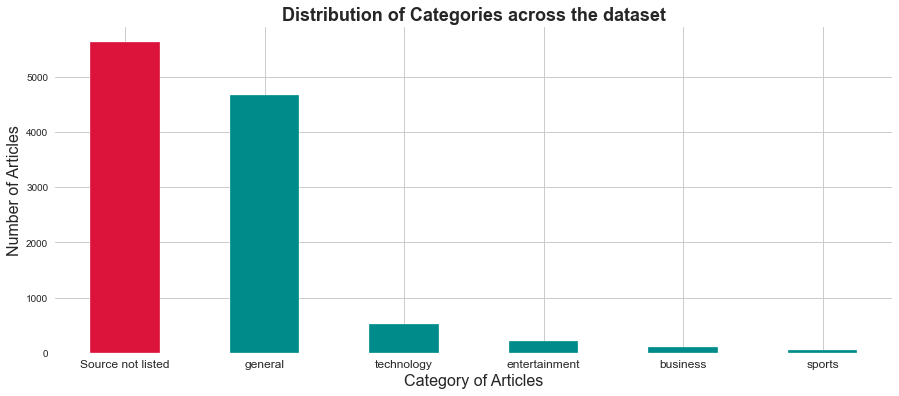

In [326]:
plt.style.use('seaborn')
sns.set_style('whitegrid')
df_processed['category'].value_counts().plot(kind='bar', figsize=(15, 6), color=['crimson', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan', 'darkcyan'])
plt.xlabel("Category of Articles", fontsize=16)
plt.xticks(rotation=0, fontsize=12)
plt.ylabel("Number of Articles", fontsize=16)
plt.title("Distribution of Categories across the dataset", fontsize=18, weight='bold')

#### As evident from the bar plot, most of the sources for the articles were not listed as part of the NewsAPI sources endpoint. Many mixed topics are included in the "general" category which is the largest catergory for our articles dataset. This only gives us a high level idea of our dataset, a very superficial classification of the news. It does not tell us the underlying topics or the most relevant news per each category.

#### To analyze the articles deeper, we will have to process the descriptions and contents of each article since the words in the articles naturally carry more meaning.

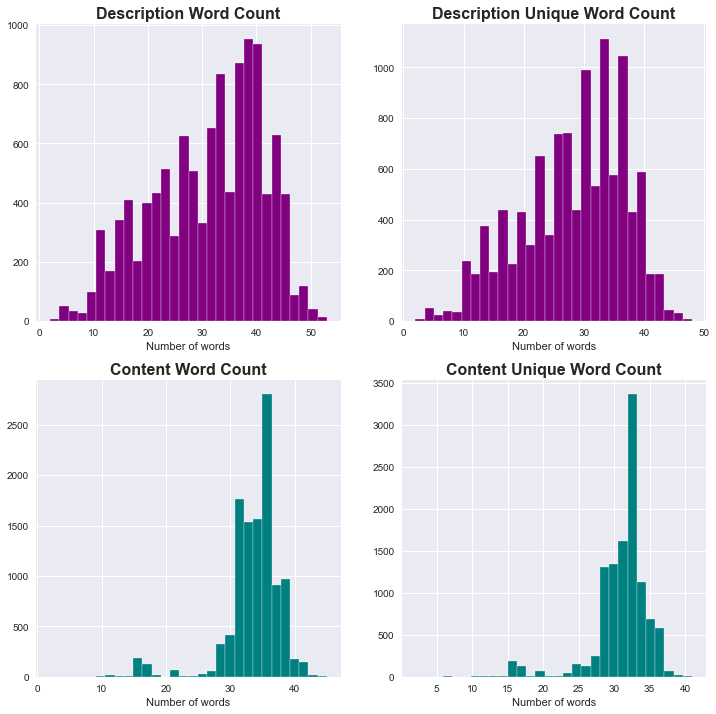

In [327]:
# The description column gives a description or snippet from the article 
# and the content column gives the unformatted content of the article truncated to 200 chars.
# Let's now check the disctribution of the word counts for the description and content columns.
plt.style.use('seaborn')
fig= plt.figure(figsize=(12,12))

ax1 = plt.subplot(221)
plt.hist(df_processed.descr_word_count, bins=30, color='purple')
plt.title('Description Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(222)
plt.hist(df_processed.descr_unique_words, bins=30, color='purple')
plt.title('Description Unique Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(223)
plt.hist(df_processed.content_word_count, bins=30, color='teal')
plt.title('Content Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

ax1 = plt.subplot(224)
plt.hist(df_processed.content_unique_words, bins=30, color='teal')
plt.title('Content Unique Word Count',weight='bold', fontsize=16)
plt.xlabel('Number of words')

plt.show()

##### From the above graphs, we can see the distribution of the words counts in both description and content columns which are our columns of interest for further analysis. The description column has a wider range of word counts anywhere from 10 to 45 words. The description column length and word count is dependent on article to article as in what snippet from the article is provided by the NewsApi. Whereas the content column is already truncated to 200 characters by NewsApi and hence we see narrow range of word counts anywhere between 30 to 40 words.

##### The interesting and useful part is that the unique words count column for both description and content are almost similar to their respective word count columns. This means even though we have limited content due to restrictions of the free version of NewsApi, most of the content provided is useful which will help a lot in our further analysis of articles.


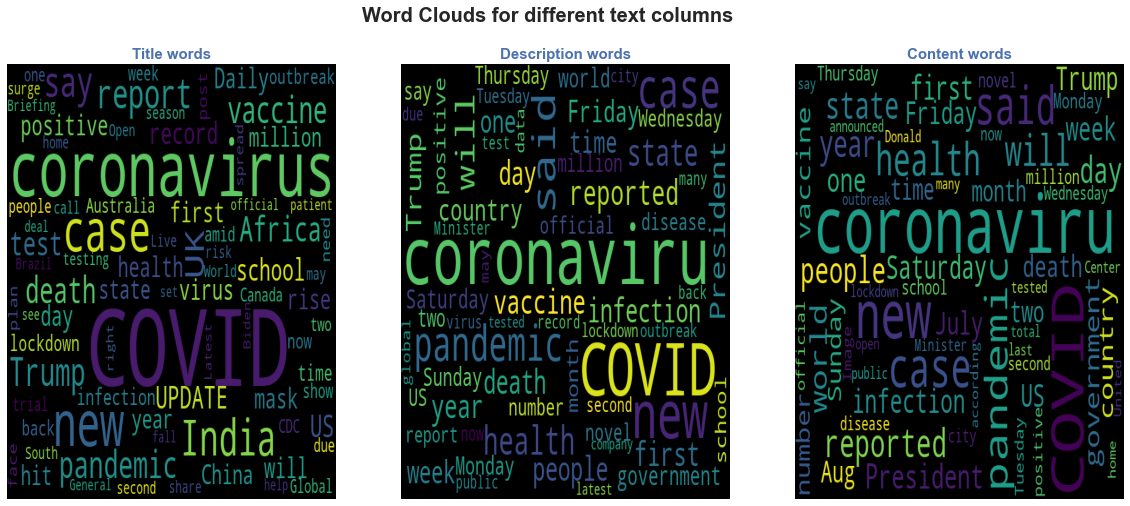

In [328]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.add('chars')
stopwords.add('Reuters')
stopwords.add('li')
stopwords.add('ha')
stopwords.add('char')
stopwords.add('ol')
    
title_words = ''
for i in df_processed.title:
    i = str(i)
    seperate = i.split()
    title_words += " ".join(seperate)+" "
    
descr_words = ''
for i in df_processed.description:
    i = str(i)
    seperate = i.split()
    descr_words += " ". join(seperate)+" "
    
content_words = ''
for i in df_processed.content:
    i = str(i)
    seperate = i.split()
    content_words += " ".join(seperate)+" "

    
wordcloud1 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(title_words)

wordcloud2 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(descr_words)

wordcloud3 = WordCloud(width=600, height=500, background_color='black', min_font_size=15, collocations=False, stopwords=stopwords).generate(content_words)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Word Clouds for different text columns', weight='bold', fontsize=20)

ax1.set_title('Title words', weight='bold', fontsize=15, color='b')
im1 = ax1.imshow(wordcloud1, aspect='auto')
ax1.axis("off")

ax2.set_title('Description words', weight='bold', fontsize=15, color='b')
im2 = ax2.imshow(wordcloud2, aspect='auto')
ax2.axis("off")


ax3.set_title('Content words', weight='bold', fontsize=15, color='b')
im3 = ax3.imshow(wordcloud3, aspect='auto')
ax3.axis("off")

plt.show()

##### From the above wordclouds of different text columns from the dataset we see that as expected all articles are related to covid or coronavirus or pandemic. We can also see names of different countries indicating articles covering world updates with some data and records. Also possible articles about vaccines and political leaders. Now that we have an idea of what kind of articles we have in the dataset, lets dig deeper to by some text pre-processing steps 